## First Demo

This Demo will showcase the feature estimation and examplar analysis using simulated data.

In [2]:
import py_neuromodulation as py_nm

from py_neuromodulation import (
    nm_analysis,
    nm_decode,
    nm_define_nmchannels,
    nm_plots
    
)
import numpy as np
from matplotlib import pyplot as plt

### Data Simulation

We will now generate some example data of 5 seconds, for 6 channels with a sample rate of 1kHz. 

In [3]:
def generate_random_walk(NUM_CHANNELS, TIME_DATA_SAMPLES):
    # from https://towardsdatascience.com/random-walks-with-python-8420981bc4bc
    dims = NUM_CHANNELS
    step_n = TIME_DATA_SAMPLES-1
    step_set = [-1, 0, 1]
    origin = (np.random.random([1,dims])-0.5)*1 # Simulate steps in 1D
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    return path.T

In [4]:
NUM_CHANNELS = 6
sfreq = 1000
TIME_DATA_SAMPLES = 5 * sfreq
data = generate_random_walk(NUM_CHANNELS, TIME_DATA_SAMPLES)
time = np.arange(0, TIME_DATA_SAMPLES/sfreq, 1/sfreq)

Text(0.5, 1.0, 'Example random walk data')

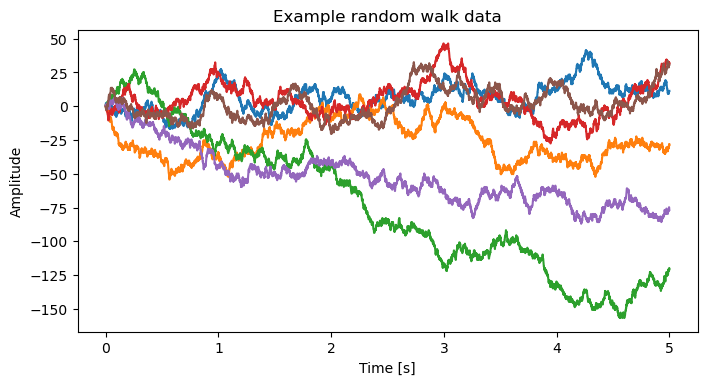

In [5]:
plt.figure(figsize=(8,4), dpi=100)
for ch_idx in range(data.shape[0]):
    plt.plot(time, data[ch_idx, :])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Example random walk data")

Now let's define the necessary setup files will be use for data preprocessing and feature estimation. 
Py_neuromodualtion is based on two parametrization files: the *nm_channels.tsv* and the *nm_setting.json*.

### nm_channels

The *nm_channel* dataframe. This dataframe contains the columns

| Column name | Description |
| --- | --- | 
|**name** | name of the channel
|**rereference** | different channel name for bipolar rereferencing, or avereage for commono average rereferencing
|**used** | 0 or 1, channel selection 
|**target** | 0 or 1, for some decoding applications we can define target chanenls, e.g. EMG channels
|**type** | channel type according to the mne-python toolbox (https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html#sphx-glr-auto-tutorials-raw-10-raw-overview-py), e.g. ecog, eeg, ecg, emg, dbs, seeg etc.  
|**status** | good or bad, used for channel quality indication
|**new_name** | this keyword can be specified to indicate for example the used rereferncing scheme

The nm_stream can either created as a *.tsv* text file, or as a pandas dataframe. There are some helper function that let you create the nm_channels without much effort: 

In [6]:
nm_channels = nm_define_nmchannels.get_default_channels_from_data(data, car_rereferencing=True)

nm_channels

,name,rereference,used,target,type,status,new_name
0,ch0,average,1,0,ecog,good,ch0-avgref
1,ch1,average,1,0,ecog,good,ch1-avgref
2,ch2,average,1,0,ecog,good,ch2-avgref
3,ch3,average,1,0,ecog,good,ch3-avgref
4,ch4,average,1,0,ecog,good,ch4-avgref
5,ch5,average,1,0,ecog,good,ch5-avgref


Using this function default channel names and a common average rereference scheme is specified. Alternatively the *nm_define_nmchannels.set_channels* function can be used to pass each column values.

### nm_settings

Next, we will initialize the nm_settings dictionary and use the default settings, reset them, and enable a subset of features:

In [7]:
settings = py_nm.nm_settings.get_default_settings()
settings = py_nm.nm_settings.reset_settings(settings)
settings

{'sampling_rate_features_hz': 10,
 'segment_length_features_ms': 1000,
 'preprocessing': [],
 'documentation_preprocessing_options': ['raw_resampling',
  'notch_filter',
  're_referencing',
  'raw_normalization'],
 'features': {'raw_hjorth': False,
  'return_raw': False,
  'bandpass_filter': False,
  'stft': False,
  'fft': False,
  'sharpwave_analysis': False,
  'coherence': False,
  'fooof': False,
  'nolds': False,
  'bursts': False,
  'linelength': False,
  'mne_connectivity': False},
 'postprocessing': {'feature_normalization': False,
  'project_cortex': False,
  'project_subcortex': False},
 'raw_resampling_settings': {'resample_freq_hz': 1000},
 'documentation_normalization_options': ['mean',
  'median',
  'zscore',
  'zscore-median',
  'quantile',
  'power',
  'robust',
  'minmax'],
 'raw_normalization_settings': {'normalization_time_s': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time_s': 30,
  'normalization_method'

The settings itself is a .json file which contains the parametrization for processing, feature estimation, postprocessing and definition which which sampling sampling rate features are being calculated. In this example 'sampling_rate_features_hz' is specified to be 10 Hz, so every 100ms a new set of features is calculated.

For many features the 'segment_length_features_ms' specifies the time dimension of the raw signal being used for feature calculation. Here it is specified to be 1000 ms.

We will now enable the features:

* fft
* bursts
* sharpwave

and stay with the default preprcessing methods:

* notch_filter
* re_referencing

and use *z-score* postprocessing normalization.

In [11]:
settings["features"]["fft"] = True
settings["features"]["bursts"] = True
settings["features"]["sharpwave_analysis"] = True

We are now ready to go to instantiate the *Stream* and call the *run* method for feature estimation:

In [12]:
stream = py_nm.Stream(
    settings=settings,
    nm_channels=nm_channels,
    verbose=True,
    sfreq=sfreq,
    line_noise=50
)

stream.run(data)

Last batch took: 0.23 seconds
1.0 seconds of data processed
Last batch took: 0.16 seconds
1.1 seconds of data processed
Last batch took: 0.06 seconds
1.2 seconds of data processed
Last batch took: 0.08 seconds
1.3 seconds of data processed
Last batch took: 0.06 seconds
1.4 seconds of data processed
Last batch took: 0.06 seconds
1.5 seconds of data processed
Last batch took: 0.08 seconds
1.6 seconds of data processed
Last batch took: 0.08 seconds
1.7 seconds of data processed
Last batch took: 0.07 seconds
1.8 seconds of data processed
Last batch took: 0.06 seconds
1.9 seconds of data processed
Last batch took: 0.08 seconds
2.0 seconds of data processed
Last batch took: 0.08 seconds
2.1 seconds of data processed
Last batch took: 0.07 seconds
2.2 seconds of data processed
Last batch took: 0.09 seconds
2.3 seconds of data processed
Last batch took: 0.06 seconds
2.4 seconds of data processed
Last batch took: 0.07 seconds
2.5 seconds of data processed
Last batch took: 0.07 seconds
2.6 second

### Feature Analysis

Ok, so there is a lot of output, which we could omit by verbose beinng False, but let's have a look what was being computed. We will therefore use the nm_analysis class to showcase some functions. For multi-run or subject analyze we will pass here the feature_file "sub" default directory:

In [14]:
analyzer = nm_analysis.Feature_Reader(
    feature_dir=stream.PATH_OUT,
    feature_file=stream.PATH_OUT_folder_name
)

Let's have a look at the resulting dataframe, lying in the "feature_arr" dataframe: 

In [15]:
analyzer.feature_arr.iloc[:10, :]

,ch0-avgref_fft_theta,ch0-avgref_fft_alpha,ch0-avgref_fft_low beta,ch0-avgref_fft_high beta,ch0-avgref_fft_low gamma,ch0-avgref_fft_high gamma,ch0-avgref_fft_HFA,ch1-avgref_fft_theta,ch1-avgref_fft_alpha,ch1-avgref_fft_low beta,...,ch5-avgref_bursts_high beta_amplitude_max,ch5-avgref_bursts_high beta_burst_rate_per_s,ch5-avgref_bursts_high beta_in_burst,ch5-avgref_bursts_low gamma_duration_mean,ch5-avgref_bursts_low gamma_amplitude_mean,ch5-avgref_bursts_low gamma_duration_max,ch5-avgref_bursts_low gamma_amplitude_max,ch5-avgref_bursts_low gamma_burst_rate_per_s,ch5-avgref_bursts_low gamma_in_burst,time
0,6.546468,6.055038,5.712085,5.344457,4.077311,3.575936,3.073599,7.261906,6.534680,6.117988,...,2.555299,0.013158,0.0,0.004692,0.418851,0.006,1.059555,0.004692,1.0,1000.0
1,6.533447,5.997047,5.625914,5.293710,4.084396,3.525447,3.002347,6.759751,6.339732,6.056182,...,2.552380,0.012947,0.0,0.004712,0.405303,0.006,1.096305,0.004712,0.0,1100.0
2,6.268532,6.090870,5.197894,5.029990,3.645181,3.323597,2.771957,6.560349,6.102949,5.503583,...,3.252250,0.012650,0.0,0.004673,0.417074,0.006,1.048534,0.004673,0.0,1200.0
3,5.996683,6.217766,5.124622,4.963206,3.656983,3.292508,2.730164,6.583069,5.872264,5.376288,...,2.555264,0.013350,0.0,0.004685,0.415159,0.007,1.558452,0.004685,0.0,1300.0
4,6.224549,5.996537,5.253904,4.951033,3.619655,3.321845,2.690349,6.539516,5.953904,5.371288,...,1.951734,0.011091,0.0,0.004942,0.452935,0.007,1.640824,0.004942,0.0,1400.0
5,6.195496,6.021192,5.475766,4.973531,3.758219,3.363169,2.701280,6.996308,5.715864,5.689286,...,2.491437,0.011955,0.0,0.004709,0.431015,0.006,1.159184,0.004709,0.0,1500.0
6,5.940742,6.031814,5.394040,4.845125,3.732568,3.374624,2.719609,7.017303,5.948729,5.913146,...,2.644537,0.011857,0.0,0.004786,0.443231,0.007,1.365416,0.004786,0.0,1600.0
7,6.755482,6.471450,5.726750,4.947040,4.120943,3.502185,2.894237,6.956465,6.269271,5.622747,...,3.215932,0.012050,0.0,0.004800,0.443768,0.007,1.049814,0.004800,1.0,1700.0
8,6.680241,6.591763,5.520228,4.693274,4.160853,3.560586,2.892736,6.839339,6.805187,5.847676,...,2.664910,0.011650,0.0,0.004883,0.471476,0.006,1.566665,0.004883,0.0,1800.0
9,6.429779,6.124585,5.413433,4.561136,3.948056,3.388687,2.649139,6.706237,6.374923,5.779951,...,2.701362,0.010476,0.0,0.004767,0.458496,0.007,1.287250,0.004767,0.0,1900.0


Seems like a lot of features were calculated. The 'time' columns tells us about each row time index. For the 6 specified channels, it is each 31 features. We can now use some in-built plotting functions for visualization.

Note: Due to the simulation data, some of the features have constant values, which are not displayed throught the image normalization.

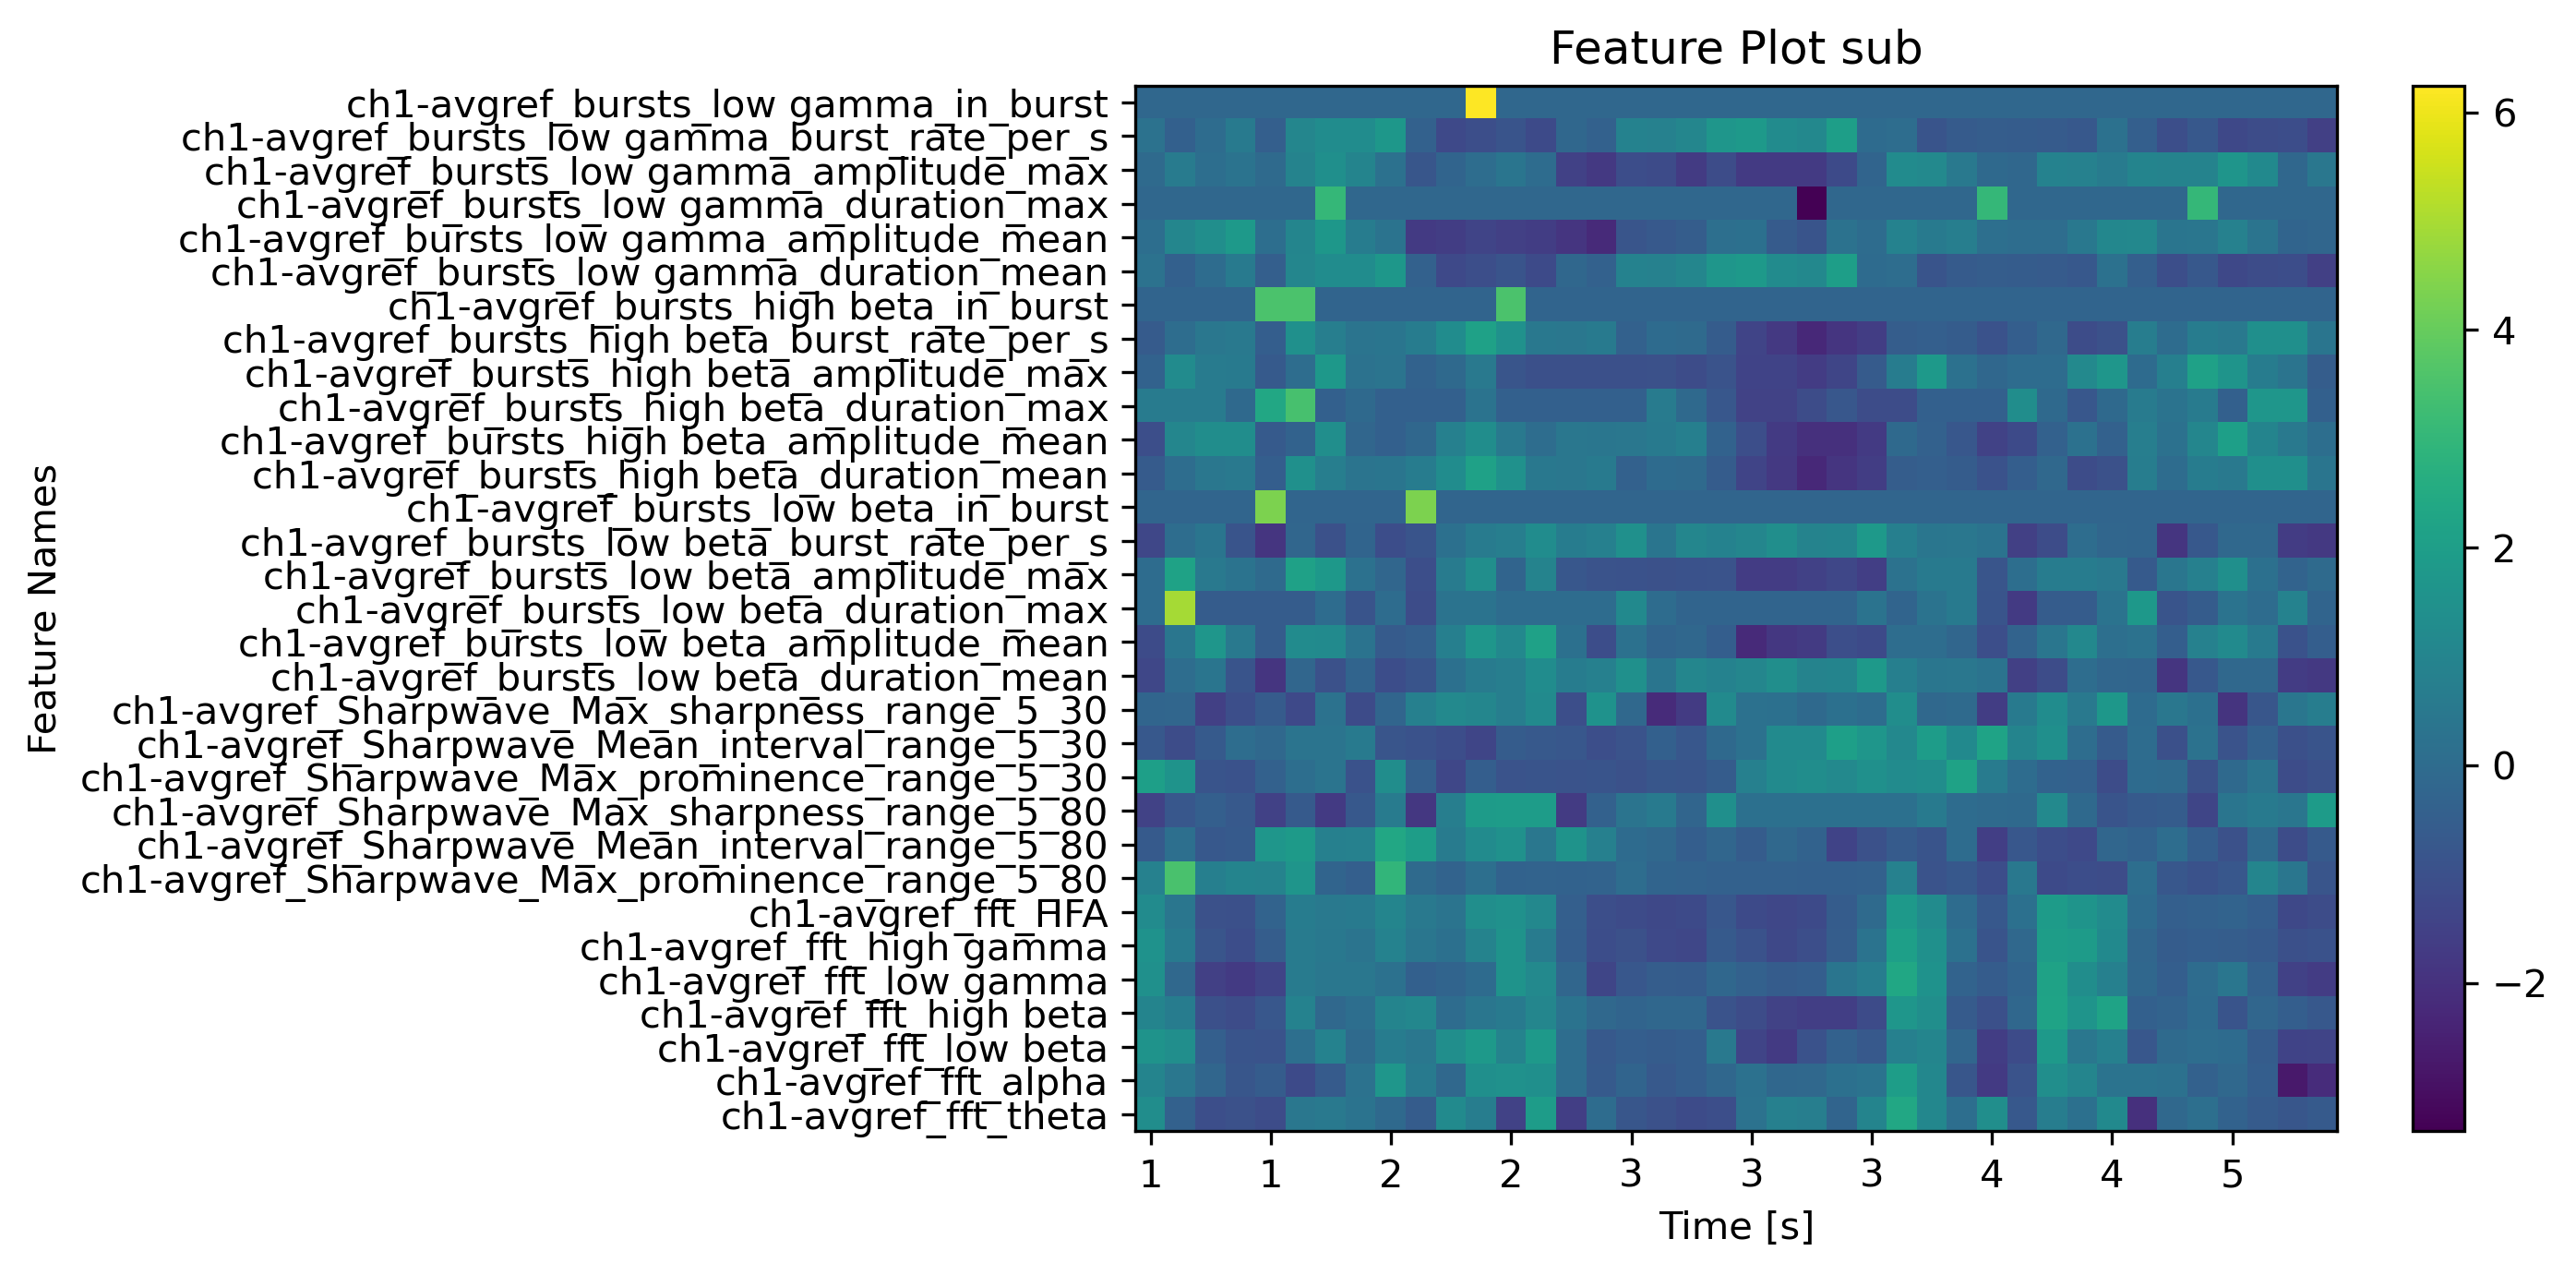

In [16]:
analyzer.plot_all_features(ch_used="ch1")

<AxesSubplot:title={'center':'Correlation matrix'}>

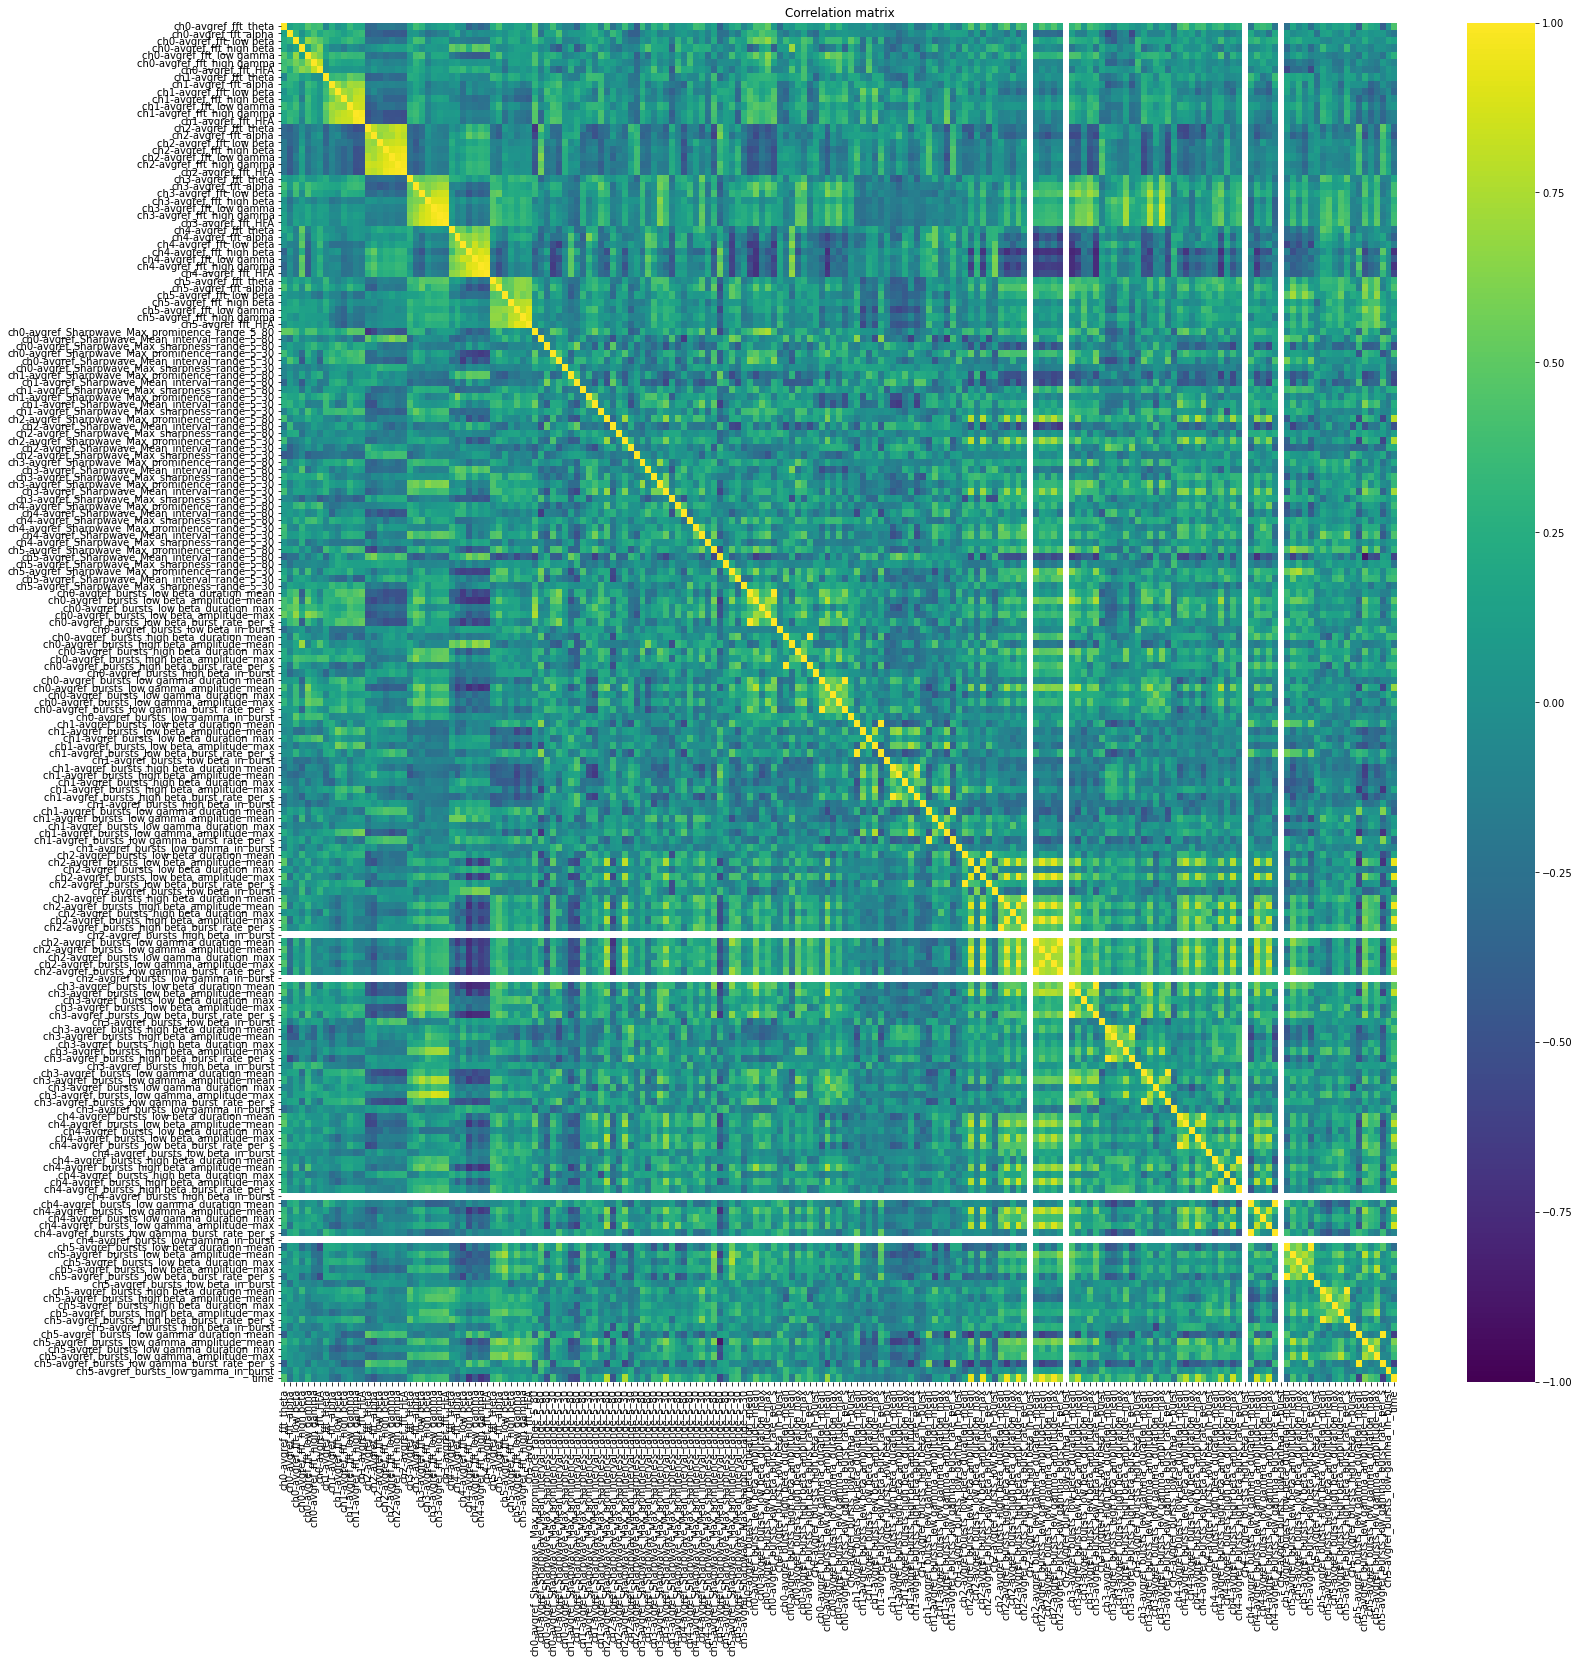

In [17]:
nm_plots.plot_corr_matrix(
    figsize=(25,25),
    show_plot=True,
    feature=analyzer.feature_arr,
)
#ax.set_xlabel("Features")
#ax.set_ylabel("Features")

The upper correlation matrix shows the correlation of every feature of every channel to every other.
This notebook demonstrated a first demo how features can quickly be generated. For further feature modalities and decoding applications check out the next notebooks.